In [76]:
from manim import *

import sys
sys.path.append('../')
import geometry_functions as gf

config.frame_width = 50


def QuickHalfHull(a, b, points, self):
    n = len(points)

    #base case of recursion
    if n == 0:  
        self.play(Create(Line([a[0], a[1],0],[b[0],b[1],0])),run_time=0.7) #add line to animation
        return [b]
    
    #find the furthest point to the line ab
    furthest = points[0]
    d = gf.distanceToLine(a, b, furthest)
    for j in range(1, n):
        d_aux = gf.distanceToLine(a, b, points[j])
        if d_aux > d: 
            furthest = points[j]
            d = d_aux

    #Add lines ac and bc to animation, where c is the furthest point that we just found
    self.play(Create(DashedLine([a[0],a[1],0],[furthest[0], furthest[1],0], dash_length = 0.7)),run_time=0.5) 
    self.play(Create(DashedLine([b[0],b[1],0],[furthest[0], furthest[1],0], dash_length = 0.7)),run_time=0.25)


    
    LeftOf_ac = [] #List of points at left of directed segment ac
    RightOf_bc = [] #List of points at right of directed segment bc
    #Fill lists
    for j in range(n):
            if gf.IsLeft(a, furthest, points[j]):
                LeftOf_ac.append(points[j])
            if gf.IsRight(b, furthest, points[j]):
                RightOf_bc.append(points[j])


    return QuickHalfHull(a, furthest, LeftOf_ac, self) + QuickHalfHull(furthest, b, RightOf_bc, self) #recursion



class QuickHull(Scene): 
    def construct(self):

        import numpy as np

        def generate_normal_distribution_points(num_points, mean, std_dev):
            points = np.random.normal(loc=mean, scale=std_dev, size=(num_points, 2))
            return points.tolist()

        # Parámetros para la distribución normal
        mean_value = 0
        std_dev_value = 5

        # Generar 25 puntos aleatorios con distribución normal
        points = generate_normal_distribution_points(1000, mean_value, std_dev_value)

        # Imprimir los puntos generados
        print(points)

        ##########################         INPUT         |###############################
        #points = [[0.5, 2], [1.5, 4], [5, 6], [10, 11], [-2, 11], [-20, 6], [10, -10], [15, -8], [-4, 6], [-7, -8], [-10, -10], [-1, -2], [0, 1], [4, 9], [1, 3], [-6, 8], [12, 0], [12,9], [-9, 6], [-10, 8], [15, 9], [-1, 0], [0, 0], [8, 8], [3, 1], [1, 1]]
        #poitns = [[-20, 6], [-2, 11], [10, 11], [15, 9], [15, -8], [10, -10], [-10, -10]] 
        
        ################################################################################

        #Find Horizontal extrema where a is the left point and b the right one
        a = points[0] 
        b = points[0]
        n = len(points)
        for j in range(0, n):
            dot = Dot([points[j][0],points[j][1],0]) #add points to animation
            self.add(dot)
            if points[j][0] < a[0]:
                a = points[j]
            if points[j][0] > b[0]:
                b = points[j]
            
        self.play( Create( DashedLine([a[0],a[1],0],[b[0],b[1],0], dash_length = 0.7)),run_time=0.25 ) #Animation of the divition


        RightOf_ab = [] #List of points at right of directed segment ab
        LeftOf_ab = [] #List of points at right of directed segment ab

        for j in range(n):
            if gf.IsLeft(a, b, points[j]):
                LeftOf_ab.append(points[j])
            if gf.IsRight(a, b, points[j]):
                RightOf_ab.append(points[j])

        ConvexHull = [a] + QuickHalfHull(a, b, LeftOf_ab, self) + QuickHalfHull(b, a, RightOf_ab, self) #Recursion
        ConvexHull.pop() #Evitar que a se repita en la solución

        self.wait(3) #wait 3 seconds before end

        print(ConvexHull) #print solution in terminal


convex = QuickHull()
convex.render()


        

[[-1.7960333165361366, 5.756837513651115], [9.35932608971387, -1.7022852977452494], [-6.076261912754138, 5.085141448201002], [-6.453963610550986, -0.25727724172140587], [-14.521150267590512, 10.020773485050176], [2.2010178421391107, 3.2041509751343162], [6.695874263149115, 5.394698622658613], [-1.9054955262818676, 2.5384149799690006], [0.06922986357749694, 2.4649782614734033], [1.467650976194895, -1.148323366061784], [1.2580764015466288, 3.0659679151370653], [-1.6728685430119925, -1.6846130218263125], [-1.9201503001266194, -4.503872405051749], [-2.0562294280993374, 0.612223412801149], [4.774457165101863, 6.741310746146041], [2.5507099741055663, 1.291798495979496], [-3.541085964165947, 6.802547700564123], [-0.18794209195360762, 4.02652880714471], [4.3032113941099475, 3.9791496480881534], [-1.3837390151186957, -3.9746193504713156], [-10.79784746790795, 1.5966377882998835], [-6.265002836789135, -2.6992361057524095], [3.088610418393189, 5.987367507651735], [9.05021085756749, 4.349229309960

[12/13/23 18:03:38] INFO     Animation 0 : Partial movie file written in                   ]8;id=884198;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=735547;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/home/rcarrasco/ComputationalGeometry/src/ConvexHull/media/v                         
                             ideos/1080p60/partial_movie_files/QuickHull/1297144041_418143                         
                             9253_4118707545.mp4'                                                                  

[12/13/23 18:03:40] INFO     Animation 1 : Partial movie file written in                   ]8;id=713301;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=853880;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/home/rcarrasco/ComputationalGeometry/src/ConvexHull/media/v                         
                             ideos/1080p60/partial_movie_files/QuickHull/1817952819_435274                         
                             830_2119230840.mp4'                                                                   

[12/13/23 18:03:42] INFO     Animation 2 : Partial movie file written in                   ]8;id=671706;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=789957;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/home/rcarrasco/ComputationalGeometry/src/ConvexHull/media/v                         
                             ideos/1080p60/partial_movie_files/QuickHull/1817952819_226565                         
                             0566_2956925994.mp4'                                                                  

[12/13/23 18:03:44] INFO     Animation 3 : Partial movie file written in                   ]8;id=111509;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=253874;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/home/rcarrasco/ComputationalGeometry/src/ConvexHull/media/v                         
                             ideos/1080p60/partial_movie_files/QuickHull/1817952819_440447                         
                             25_3482223673.mp4'                                                                    

[12/13/23 18:03:46] INFO     Animation 4 : Partial movie file written in                   ]8;id=637086;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=423541;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/home/rcarrasco/ComputationalGeometry/src/ConvexHull/media/v                         
                             ideos/1080p60/partial_movie_files/QuickHull/1817952819_293355                         
                             9515_4155715692.mp4'                                                                  

[12/13/23 18:03:49] INFO     Animation 5 : Partial movie file written in                   ]8;id=367049;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=587766;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/home/rcarrasco/ComputationalGeometry/src/ConvexHull/media/v                         
                             ideos/1080p60/partial_movie_files/QuickHull/1817952819_278087                         
                             695_116865954.mp4'                                                                    

In [ ]:
from manim import *

class SquareToCircle(Scene):
    def construct(self):
        square = Square()
        circle = Circle()
        circle.set_fill(PINK, opacity=0.5)
        self.play(Create(square))
        self.play(Transform(square, circle))
        self.wait()

# Crear una instancia de la clase y ejecutar la animación
anim = SquareToCircle()
anim.render()


                    INFO     Animation 0 : Using cached data (hash :                           ]8;id=793951;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=151633;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1297144041_724148594_223132457)                                                       

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=941838;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=89694;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1817952819_2452225903_666618010)                                                      

                    INFO     Animation 2 : Using cached data (hash :                           ]8;id=585131;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=540642;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1817952819_1122450819_1004412148)                                                     

                    INFO     Combining to Movie file.                                      ]8;id=133251;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=118685;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=29213;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=685087;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             '/home/rcarrasco/ComputationalGeometry/src/ConvexHull/media/v                         
                             ideos/1080p60/QuickHull.mp4'                                                          
                                                                                                                   

                    INFO     Rendered SquareToCircle                                                   ]8;id=282882;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=848544;file:///home/rcarrasco/.local/lib/python3.8/site-packages/manim/scene/scene.py#241\241]8;;\
                             Played 3 animations                                                                   

In [ ]:
import numpy as np

def read_off(file_path):
    with open(file_path, 'r') as file:
        # Lee la primera línea para obtener el formato y el número de vértices y caras
        line = file.readline().strip()
        if line != 'OFF':
            raise ValueError('El archivo no está en formato OFF')
        
        # Lee la segunda línea para obtener el número de vértices, caras y aristas
        num_vertices, num_faces, _ = map(int, file.readline().strip().split())
        
        # Lee los vértices
        vertices = []
        for _ in range(num_vertices):
            vertex = list(map(float, file.readline().strip().split()))
            vertices.append(tuple(vertex[:2]))  # Tomamos solo las dos primeras coordenadas para 2D
        print(vertices)
    return vertices

In [ ]:

# Ejemplo de uso
file_path_points = 'all_points.off'  # Reemplaza 'tu_archivo.off' con la ruta de tu archivo .off
all_points = read_off(file_path)

from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
hull = ConvexHull(all_points)

[(1.394121, 1.569978), (0.533093, 2.411361), (0.026439, -1.203636), (0.408557, -0.974564), (-0.727779, 1.38484), (0.864039, 0.486525), (1.717156, 1.549229), (1.483871, -0.070344), (1.092839, 0.413918), (0.697051, 2.489188), (0.37677, 0.603437), (-1.089535, 0.893642), (0.127626, 2.437312), (1.012269, 1.938239), (0.401447, 0.545312), (0.434161, 0.319348), (2.448904, 0.459377), (1.232277, 0.158988), (1.150552, 0.526872), (1.377165, 1.664249), (0.516895, 0.524019), (0.532717, -0.766243), (-1.260077, 0.524599), (0.425415, 2.029789), (0.439223, 0.469135), (0.246902, 1.169461), (-0.166539, -0.678632), (1.058873, 0.53382), (1.827856, 0.581217), (1.024825, 1.744199), (0.631022, 0.110064), (0.678105, 1.031387), (0.412053, 0.663023), (0.675741, 0.986756), (2.308443, -0.145311), (0.856403, 0.457573), (-0.21894, 0.49881), (0.087607, 0.13162), (0.541247, 1.775568), (-0.266646, 1.383309), (1.455575, -0.095753), (2.284977, 1.367812), (0.205149, -0.851397), (-0.005756, 0.007638), (-0.253692, 0.553485),

In [ ]:

# Ejemplo de uso
file_path_points = 'all_points.off'  # Reemplaza 'tu_archivo.off' con la ruta de tu archivo .off
all_points = read_off(file_path_points)

# Ejemplo de uso
file_path_candidates = 'candidates.off'  # Reemplaza 'tu_archivo.off' con la ruta de tu archivo .off
candidates_points = read_off(file_path_candidates)

interior_points = set(all_points) - set(candidates_points)
interior_points = list(interior_points)
len(interior_points)

[(1.394121, 1.569978), (0.533093, 2.411361), (0.026439, -1.203636), (0.408557, -0.974564), (-0.727779, 1.38484), (0.864039, 0.486525), (1.717156, 1.549229), (1.483871, -0.070344), (1.092839, 0.413918), (0.697051, 2.489188), (0.37677, 0.603437), (-1.089535, 0.893642), (0.127626, 2.437312), (1.012269, 1.938239), (0.401447, 0.545312), (0.434161, 0.319348), (2.448904, 0.459377), (1.232277, 0.158988), (1.150552, 0.526872), (1.377165, 1.664249), (0.516895, 0.524019), (0.532717, -0.766243), (-1.260077, 0.524599), (0.425415, 2.029789), (0.439223, 0.469135), (0.246902, 1.169461), (-0.166539, -0.678632), (1.058873, 0.53382), (1.827856, 0.581217), (1.024825, 1.744199), (0.631022, 0.110064), (0.678105, 1.031387), (0.412053, 0.663023), (0.675741, 0.986756), (2.308443, -0.145311), (0.856403, 0.457573), (-0.21894, 0.49881), (0.087607, 0.13162), (0.541247, 1.775568), (-0.266646, 1.383309), (1.455575, -0.095753), (2.284977, 1.367812), (0.205149, -0.851397), (-0.005756, 0.007638), (-0.253692, 0.553485),

115

In [ ]:
wea = interior_points[:len(interior_points) - 64]
wea.extend(candidates_points)
len(wea)

64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D projection
import plotly.express as px
from IPython.display import HTML

def plot_2d_points(points):
    plt.scatter(points[:, 0], points[:, 1], c='b', marker='o')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Puntos en 2D')
    plt.grid(True)
    plt.show()


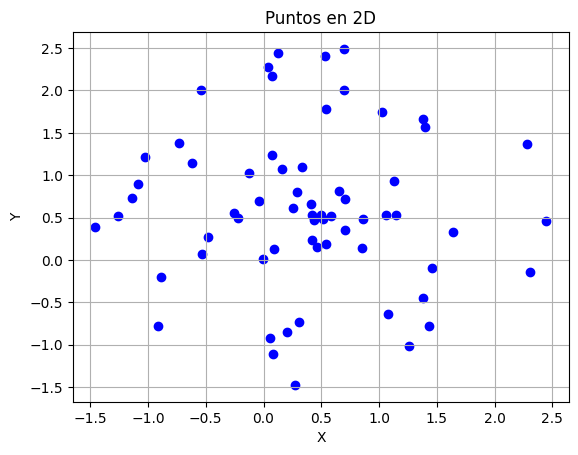

In [ ]:
plot_2d_points(np.array(wea))

In [ ]:
from manim import *

import sys
sys.path.append('../')
import geometry_functions as gf

config.frame_width = 10


points = [list(t) for t in wea]
class GrahamScan(Scene): 
    def construct(self):
        ##########################         INPUT         ###############################
        
        # IMPORTANT: Assume there is no repeated points
        #points = [[-6.5, 0], [6, 0], [0, 7], [1, 5], [-8, 6], [9, -5], [5.3, -6], [-3, 2], [-2, -2], [-3, -2], [-3, -3], [3, 5], [4, 6], [-2, -7], [4.5, 5.6], [5.89, -7], [-6.5, -7], [5, 5], [1.5, 1.5], [4, -5] ]
        #points = [[0.5, 2], [1.5, 4], [5, 6], [10, 11], [-2, 11], [-20, 6], [10, -10], [15, -8], [-4, 6], [-7, -8], [-10, -10], [-1, -2], [0, 1], [4, 9], [1, 3], [-6, 8], [12, 0], [12,9], [-9, 6], [-10, 8], [15, 9], [-1, 0], [0, 0], [8, 8], [3, 1], [1, 1]]

        ################################################################################


        n = len(points)
        gf.QuickSort_x(points, 0, n-1) # sort input using quick sort

        #Add input points to animation
        for j in range(n):
            dot = Dot([points[j][0],points[j][1],0])
            self.add(dot)


        # List for points in the upper part of convex hull
        L_upper = []
        # Add first two points to the list L_upper
        L_upper.append(points[0]) 
        L_upper.append(points[1])


        lines = [] #Array to store lines in animation
        #Add first line to the list 
        lines.append(Line([L_upper[0][0], L_upper[0][1],0], [L_upper[1][0], L_upper[1][1],0]))
        self.play(Create(lines[0]),run_time=0.5)

        
        for j in range(2, n):
            L_upper.append(points[j]) #Append p_i to the list

            #Draw the line in animation
            lines.append(Line([L_upper[-2][0], L_upper[-2][1],0], [L_upper[-1][0], L_upper[-1][1],0]))
            self.play(Create(lines[-1]),run_time=0.5)

            #while L_upper contains more than two points and the last three points in the list dont make a right turn
            while len(L_upper) > 2 and gf.IsRight(L_upper[-3], L_upper[-1], L_upper[-2]):

                ###########  Delete the middle of the las three points using pop() and an auxiliar point
                p_aux = L_upper.pop()
                L_upper.pop()
                L_upper.append(p_aux)
                
                #Add a line joining the last two points in L_upper
                lines.append(Line([L_upper[-2][0], L_upper[-2][1],0], [L_upper[-1][0], L_upper[-1][1],0]))
                self.play(Create(lines[-1]),run_time=0.5)

                self.remove(lines[-2]) #Animation: remove line joining the delated point and the last point in the list
                self.remove(lines[-3]) #Animation: remove line joining the delated point and L_upper[-2]

                #Update list of lines
                l_aux = lines.pop() 
                lines.pop()
                lines.pop()
                lines.append(l_aux)
       
        # List for points in the lower part of convex hull
        L_lower = []
        # Add the last two points to the list L_lower
        L_lower.append(points[n-1])
        L_lower.append(points[n-2])

        lines = [] #Array to store lines in animation
        #Add first line to the list 
        lines.append(Line([L_lower[0][0], L_lower[0][1],0], [L_lower[1][0], L_lower[1][1],0]))
        self.play(Create(lines[0]),run_time=0.5)
     
        for i in range(2, n):
            j = n - i - 1 #change of index variable 

            L_lower.append(points[j])#Append p_i to the list


            #Draw the line in animation
            lines.append(Line([L_lower[-2][0], L_lower[-2][1],0], [L_lower[-1][0], L_lower[-1][1],0]))
            self.play(Create(lines[-1]),run_time=0.5)

            #while L_lower contains more than two points and the last three points in the list dont make a right turn
            while len(L_lower) > 2 and gf.IsRight(L_lower[-3], L_lower[-1], L_lower[-2]):

                ###########  Delete the middle of the last three points using pop() and an auxiliar point
                p_aux = L_lower.pop()
                L_lower.pop()
                L_lower.append(p_aux)

                #Add a line joining the last two points in L_lower
                lines.append(Line([L_lower[-2][0], L_lower[-2][1],0], [L_lower[-1][0], L_lower[-1][1],0]))
                self.play(Create(lines[-1]),run_time=0.5)
                
                self.remove(lines[-2]) #Animation: remove line joining the delated point and the last point in the list
                self.remove(lines[-3]) #Animation: remove line joining the delated point and L_upper[-2]

                #Update list of lines
                l_aux = lines.pop()
                lines.pop()
                lines.pop()
                lines.append(l_aux)

        #Avoid repeted points in solution 
        L_upper.pop() 
        L_lower.pop()
        ConvexHull = L_upper + L_lower #Concatenate to get the solution
        print(ConvexHull) #print solution in terminal
        self.wait(3) #Wait 3 seconds before end

In [ ]:

convex = GrahamScan()
convex.render()


TypeError: 'tuple' object does not support item assignment

In [ ]:
wea

[(0.087607, 0.13162),
 (1.394121, 1.569978),
 (1.125489, 0.931588),
 (0.70843, 0.353216),
 (0.416681, 0.240603),
 (0.085606, -1.10615),
 (-0.253692, 0.553485),
 (-0.621095, 1.140285),
 (1.058873, 0.53382),
 (0.856909, 0.144252),
 (0.288889, 0.805188),
 (0.510842, 0.488732),
 (0.159762, 1.069796),
 (1.024825, 1.744199),
 (0.464446, 0.154957),
 (0.076413, 2.166271),
 (0.540114, 0.188699),
 (0.864039, 0.486525),
 (0.336926, 1.094197),
 (0.706877, 0.716404),
 (-0.122588, 1.026521),
 (0.651711, 0.818506),
 (0.533093, 2.411361),
 (-1.260077, 0.524599),
 (1.455575, -0.095753),
 (0.439223, 0.469135),
 (-0.040932, 0.691416),
 (-0.884821, -0.201769),
 (-1.14077, 0.728206),
 (-0.727779, 1.38484),
 (-0.005756, 0.007638),
 (-0.479208, 0.271967),
 (0.4187, 0.530898),
 (0.205149, -0.851397),
 (-0.533453, 0.065034),
 (0.696796, 2.007418),
 (0.071487, 1.232657),
 (1.380024, -0.448241),
 (-0.21894, 0.49881),
 (0.412053, 0.663023),
 (0.581949, 0.517164),
 (1.377165, 1.664249),
 (1.150552, 0.526872),
 (0.